In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.utils import np_utils

**The CIFAR-10 dataset**
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
print(train_images.shape)
print(train_images[0].shape)
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images =  test_images / 255.0

print("shape of train labels:", train_labels.shape)
print("some train labels", train_labels[:10])
print(train_images[0])


(50000, 32, 32, 3)
(32, 32, 3)
shape of train labels: (50000, 1)
some train labels [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.

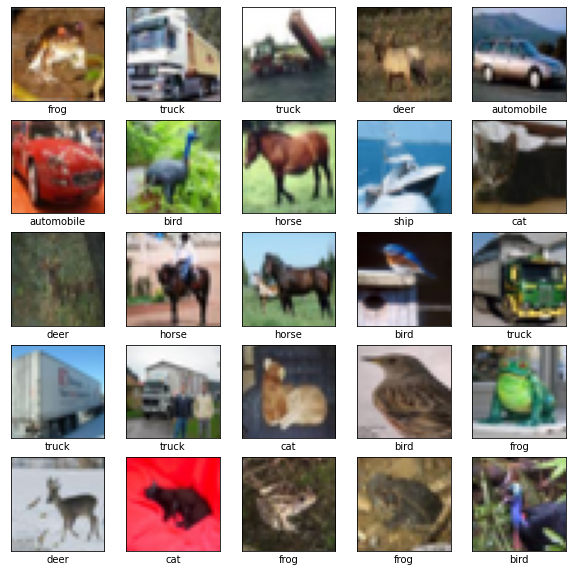

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [4]:
#TO DO: create a CNN model
# TODO: add dropout to reduce overfitting, more danse layers, Conv2D parameters, layer orders, ecc
model = keras.Sequential()
model.add(
    layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        input_shape=(32, 32, 3)
    )
) 
model.add(
    layers.MaxPool2D(
        (2, 2)
    )
)
model.add(
    layers.Conv2D(
        64,
        (3, 3),
        activation="relu"
    )
)  
model.add(
    layers.MaxPool2D(
        (2,2)
    )
)
model.add(
    layers.Conv2D(
        64,
        (3, 3),
        activation="relu"
    )
) 
model.add(
    layers.Flatten()
)
model.add(
    layers.Dense(
        64,
        activation="relu"
    )
)
model.add(
    layers.Dense(
        10,
        activation="softmax"
    )
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

2022-04-04 08:55:07.471898: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-04 08:55:07.471912: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-04 08:55:07.471922: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (80d80221f392): /proc/driver/nvidia/version does not exist
2022-04-04 08:55:07.472036: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
#TO DO: compile and train
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


2022-04-04 08:55:07.789618: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.
2022-04-04 08:55:07.979159: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4900 - accuracy: 0.4589 - val_loss: 1.1901 - val_accuracy: 0.5767
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1237 - accuracy: 0.6050 - val_loss: 1.0813 - val_accuracy: 0.6198
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9751 - accuracy: 0.6584 - val_loss: 0.9905 - val_accuracy: 0.6488
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8718 - accuracy: 0.6958 - val_loss: 0.9013 - val_accuracy: 0.6806
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7972 - accuracy: 0.7197 - val_loss: 0.8614 - val_accuracy: 0.6997
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7397 - accuracy: 0.7396 - val_loss: 0.8758 - val_accuracy: 0.6963
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6850 - accuracy: 0.7581 - val_loss: 0.9978 - val_accuracy:

In [6]:
# save model
model.save('model_cnn.h5')

**Model evaluation**

313/313 - 0s - loss: 0.8759 - accuracy: 0.7128


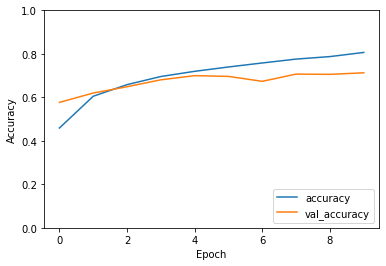

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

#TO DO: evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

**Confusion matrix**

even if we use a different library to build our classifiers, we can still mix-and-match and use utilies functions from other libraries to analyze and evaluate the performance of a model. 

In [8]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(test_images)
matrix = confusion_matrix(test_labels, y_pred.argmax(axis=1))
print(matrix)

[[732  19  73  10  25   6  14  13  72  36]
 [ 24 833   9   9   3   1  11   2  34  74]
 [ 49   5 622  46  91  35  90  33  18  11]
 [ 23  10  83 478  86 129 111  39  17  24]
 [ 21   2  77  40 694  30  58  62  10   6]
 [ 11   7  76 190  55 534  55  59   7   6]
 [  7   2  45  33  34   6 853   9   6   5]
 [ 22   1  46  39  63  42  11 751   4  21]
 [ 66  24  18  12   6   7   9   6 830  22]
 [ 32  84  12   9   4   1  15   6  36 801]]


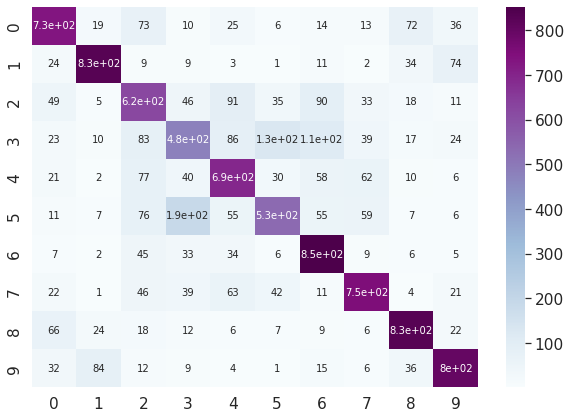

In [9]:
import seaborn as sn
import pandas  as pd 
 
df_cm = pd.DataFrame(matrix, range(10),range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="BuPu",annot=True,annot_kws={"size": 10})# font size
plt.show()

**Analyze the outputs from intermediate convolutional layers**




In [10]:
model.layers

In [11]:
#TO DO : print the name and shape of the conv layers
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    
    if "conv" not in layer.name:
        continue
        
    print(i, layer.name, layer.output.shape)

0 conv2d (None, 30, 30, 32)
2 conv2d_1 (None, 13, 13, 64)
4 conv2d_2 (None, 4, 4, 64)


In [12]:
#TO DO : create a new model using layers from the previous model
# redefine model to output right after the first hidden layer
model_v = keras.Model(inputs=model.inputs, outputs=model.layers[0].output)
model_v.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [13]:
#TO DO: get the feature maps for an images
feature_maps = model_v.predict(train_images[4].reshape(1, 32, 32, 3))
#print(feature_maps)
print(feature_maps.shape)

(1, 30, 30, 32)


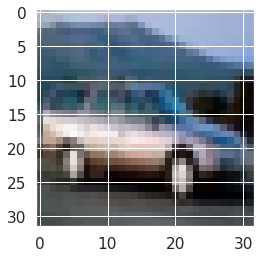

In [14]:
plt.imshow(train_images[4])

[]

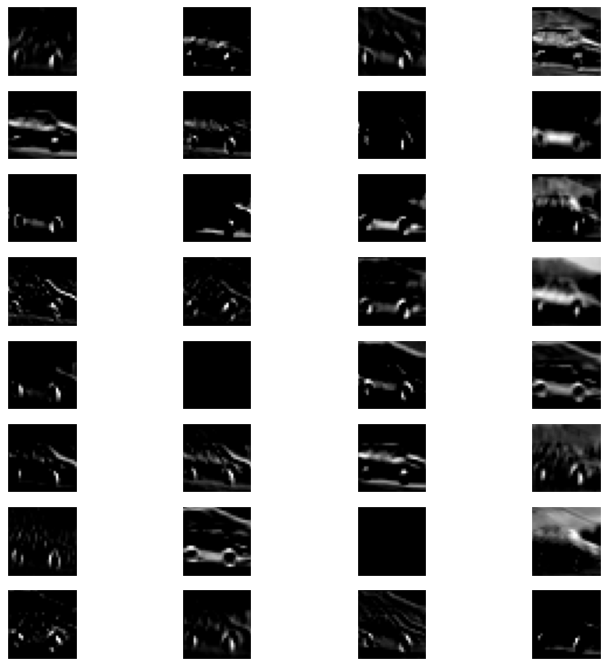

In [15]:
#TO DO : plot the feature maps
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
fig  = plt.figure(figsize=(12,12))

for i in range(32):
    sub = fig.add_subplot(8,4, i+1)
    sub.imshow(feature_maps[0,:,:,i], cmap = "gray") 
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

In [16]:
#TO DO : repeat the above process using the second conv layer in our initial model
# redefine model to output right after the second conv  layer
model_v_2 = keras.Model(inputs=model.inputs, outputs=model.layers[2].output)
model_v_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


In [17]:
#TO DO: get the feature maps for an images
feature_maps_2 = model_v_2.predict(train_images[4].reshape(1, 32, 32, 3))
#print(feature_maps_2)
print(feature_maps_2.shape)

(1, 13, 13, 64)


[]

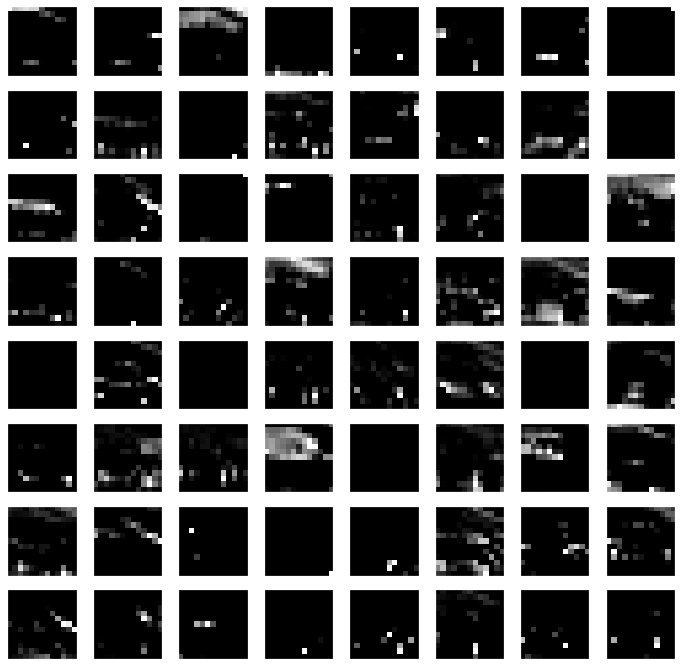

In [18]:
#TO DO : plot the featue maps
fig  = plt.figure(figsize=(12,12))

for i in range(64):
    sub = fig.add_subplot(8,8, i+1)
    sub.imshow(feature_maps_2[0,:,:,i], cmap = "gray")
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

(1, 4, 4, 64)


[]

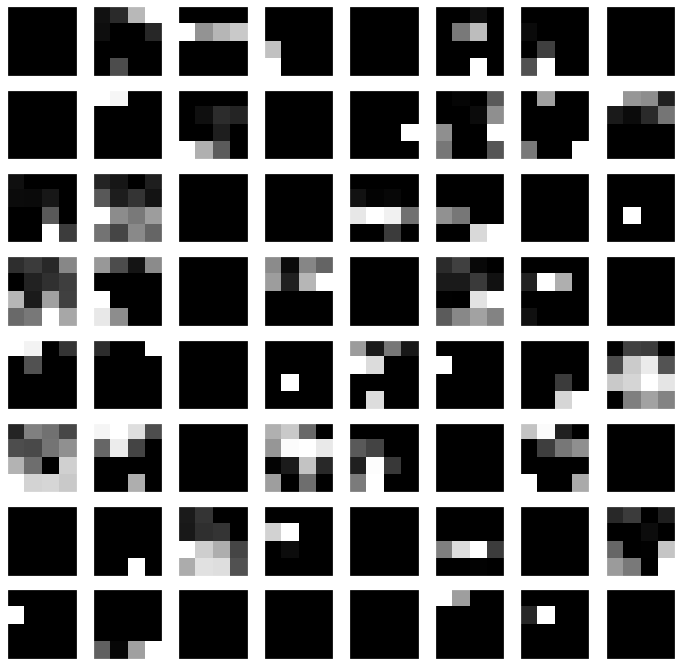

In [19]:
#TO DO : repeat the above process using the third conv layer in our initial model
# redefine model to output right after the third conv  layer
model_v_4 = keras.Model(inputs=model.inputs, outputs=model.layers[4].output)
#TO DO: get the feature maps for an images
feature_maps_4 = model_v_4.predict(train_images[4].reshape(1, 32, 32, 3))
#print(feature_maps_2)
print(feature_maps_4.shape)

#TO DO : plot the featue maps
fig  = plt.figure(figsize=(12,12))

for i in range(64):
    sub = fig.add_subplot(8,8, i+1)
    sub.imshow(feature_maps_4[0,:,:,i], cmap = "gray")
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

**HOMEWORK:  plot the learned filters**

Hint: the learned filters are simply the weights